In [1]:
# 국어, 수학 vector 상관계수 = 내적 (나눗셈 비용이 높음, 내적이 더 간단해서 내적을 구하는 것)

In [ ]:
# 회귀분석 : 
- 회귀분석 다중공선성 : 종속변수가 과하게 영향을 받을 수 있음
- 회귀분석 자기상관성 (Autocorelation)이 존재 => 시계열 분석 해야 함 (오늘 데이터가 내일에 영향을 줌)
- 시계열 분석 ARMA (Autorelation + Moving Average)
    - 이동평균법 (주파수를 줄여줌 => 복잡하면 분석 불가)
    - 정상성을 띈 데이터에만 가능 (인데 이런게 없... 그래서 비정상성을 정상성으로 만들어서 분석)
- ARIMA (Autoregressive Integrated Moving Average) => 비정상성을 가진 데이터에도 가능
- pandas는 시계열 분석을 지원 (시간 index 지원)

In [288]:
import numpy as np
from statistics import *
x = np.array([7,8,9,10])
y = np.array([9,10,15,16])
print(y.mean()) # 통계 : 중위수(medians) 이상치의 영향을 받지 않기 때문에
# 공분산 행렬
print("공분산", np.cov(x,y))
# 상관계수 행렬 (열 2, 행2)
print("상관계수", np.corrcoef(x,y))

12.5
공분산 [[ 1.66666667  4.33333333]
 [ 4.33333333 12.33333333]]
상관계수 [[1.         0.95577901]
 [0.95577901 1.        ]]


In [13]:
import numpy as np
arr = np.array([[1,2,3],[4,5,6],[7,8,9]])
print("원본", arr)
print("누적합(행)=", arr.cumsum(0))
print("누적곱(열)=", arr.cumprod(1))
print("배열의 합계=", arr.sum())
print("열방향으로의 합계(행평균=)", arr.mean(axis=1)) # 행방향과 열방향의 구분
print("행방향으로의 합계", arr.sum(axis=0))

원본 [[1 2 3]
 [4 5 6]
 [7 8 9]]
누적합(행)= [[ 1  2  3]
 [ 5  7  9]
 [12 15 18]]
누적곱(열)= [[  1   2   6]
 [  4  20 120]
 [  7  56 504]]
배열의 합계= 45
열방향으로의 합계(행평균=) [2. 5. 8.]
행방향으로의 합계 [12 15 18]


In [17]:
# 가중치를 부여한다는 의미:
a = np.array([1,2,3,4])
wts = np.array([4,3,2,1])
print(np.average(a,weights = wts))
std = np.sqrt(np.mean(abs(a-a.mean())**2))
print(np.var([1,2,3,4]))
print(np.std([1,2,3,4]))

2.0
1.25
1.118033988749895


In [ ]:
# matplotlib, seaborn, pandas plot
- matplotlib 로 구성
- 아나콘다에서는 %matplotlib inline을 사용해야 출력됨 ( 파이참은 필요 없음 )

data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358


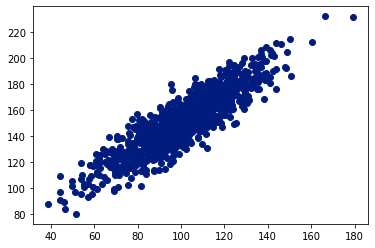

In [4]:
%matplotlib inline
from numpy import mean # 메모리 낭비를 절감
from numpy import std
from numpy.random import randn # 서브 패키지 : linalg, random, fft(푸리에변환), poly(다차방정식)
from numpy.random import seed # random : 의사난수 (데이터 출력 순서가 정해져있음)
from matplotlib import pyplot
seed(1) # 같은 수가 나옴
data1 = 20 * randn(1000) + 100 # randn = rand normal 정규분포에서 100개 발생시켜랏
data2 = data1 + (10*randn(1000)+50)
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
pyplot.scatter(data1, data2) # 산포도
pyplot.show()

In [2]:
import matplotlib.pyplot as plt
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


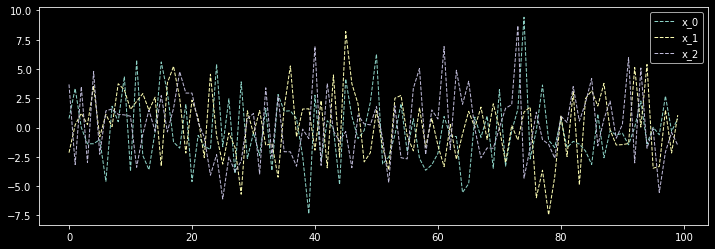

In [29]:
plt.style.use(['dark_background'])
xs = np.random.normal(0,3, (100,3)) # 평균0, 표준편차 3, 100x3 데이터 생성
plt.figure(figsize=(12,4)) # 모양을 결정
for i in range(0,3):
    x = xs[:, i]
    plt.plot(range(0, len(x)), x, linewidth=1, linestyle='--', label='x_{}'.format(i))
plt.legend() # 범례
plt.grid(False) # 격자선
plt.show()

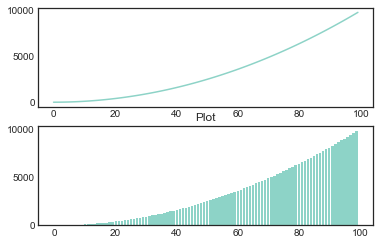

In [38]:
# 화면분할
plt.style.use(['seaborn-white'])
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1) # 2행 1열 중 첫번째 자리
ax2 = fig.add_subplot(2,1,2) # 2행 1열 중 두번째 자리

x = range(0, 100)
y = [v*v for v in x]

ax1.plot(x,y)
ax2.bar(x,y) # 막대그래프
plt.title("Plot")
plt.show()

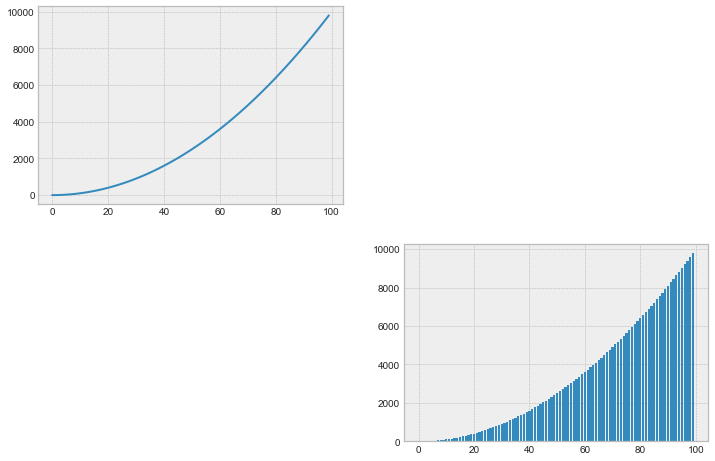

In [40]:
plt.style.use(['bmh'])
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,2,1) # 2행 1열 중 첫번째 자리
ax2 = fig.add_subplot(2,2,4) # 2행 1열 중 두번째 자리

x = range(0, 100)
y = [v*v for v in x]

ax1.plot(x,y)
ax2.bar(x,y) # 막대그래프

plt.show()

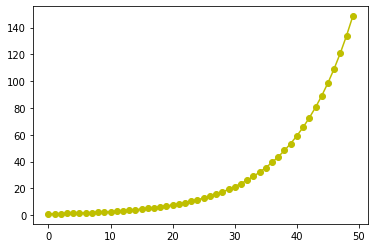

In [8]:
plt.style.use(['seaborn-dark-palette'])
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

plt.plot(np.exp(x1), 'yo-') # 지수함수의 그래프
plt.show()

AxesSubplot(0.125,0.536818;0.775x0.343182)
AxesSubplot(0.125,0.125;0.775x0.343182)


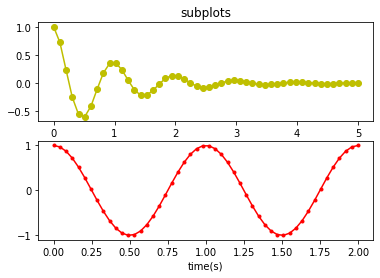

In [9]:
plt.style.use(['seaborn-dark-palette'])

y1 = np.cos(2*np.pi * x1)*np.exp(-x1)
y2 = np.cos(2*np.pi * x2)
ax1 = plt.subplot(2,1,1)
plt.plot(x1, y1, 'yo-') # yellow, point marking linetype
plt.title('subplots')
print(ax1)
ax2 = plt.subplot(2,1,2)
plt.plot(x2, y2, 'r.-')
plt.xlabel('time(s)')
print(ax2)
plt.show()

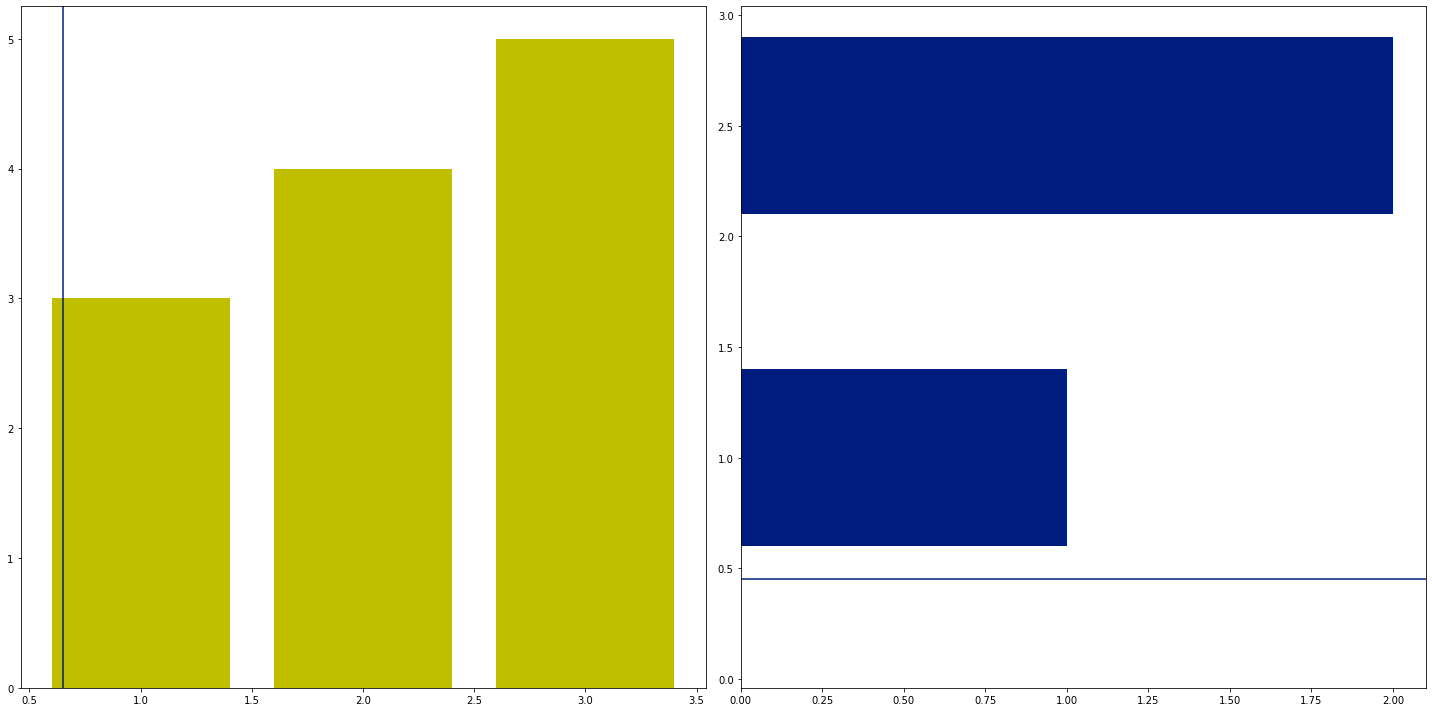

In [10]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
# 이산형 막대그래프, 연속 그래프는 히스토그램
ax1.bar([1,2,3],[3,4,5], color='y')
ax2.barh([0.5, 1,2.5],[0,1,2])
ax1.axvline(0.65) 
ax2.axhline(0.45)
plt.tight_layout() # 여백을 줄여서 표현
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x25025a54ec8>,
 'caps': [<matplotlib.lines.Line2D at 0x25025a6ee88>,
 'boxes': [<matplotlib.lines.Line2D at 0x25025a6acc8>],
 'medians': [<matplotlib.lines.Line2D at 0x25025a72f88>],
 'fliers': [<matplotlib.lines.Line2D at 0x25025a78e08>],
 'means': []}

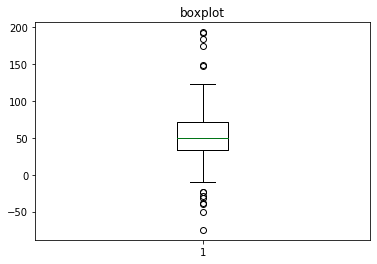

In [11]:
# boxplot
# IQR (inter quantile range = 3 사분위수 - 1사분위수)
# IQR * +/- 1.5 ; 상하한선
np.random.seed(19680801)
spread = np.random.rand(50)*100
center = np.ones(25)*50
flier_high = np.random.rand(10)*100 + 100
flier_low = np.random.rand(10)*100 - 100
data = np.concatenate((spread, center, flier_high, flier_low)) # 데이터를 병합
fig1, ax1 = plt.subplots() # 형태를 제어, 도화지
ax1.set_title('boxplot')
ax1.boxplot(data)

{'whiskers': [<matplotlib.lines.Line2D at 0x2502569cd08>,
 'caps': [<matplotlib.lines.Line2D at 0x250256b1f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x250256af8c8>],
 'medians': [<matplotlib.lines.Line2D at 0x250256b6fc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x250256b6f48>],
 'means': []}

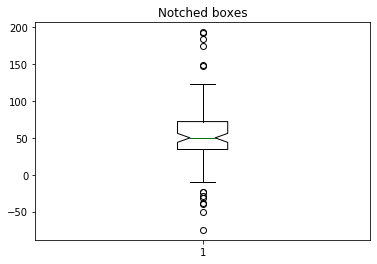

In [13]:
fig2, ax2 = plt.subplots()
ax2.set_title('Notched boxes') # 홈이 95% 신뢰구간
ax2.boxplot(data, notch=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x25024f38308>,
 'caps': [<matplotlib.lines.Line2D at 0x25025017908>,
 'boxes': [<matplotlib.lines.Line2D at 0x25024f37908>],
 'medians': [<matplotlib.lines.Line2D at 0x25024f3f0c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x25024f3fec8>],
 'means': []}

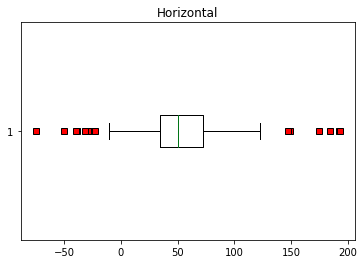

In [15]:
red_square =dict(markerfacecolor='r', marker='s') # square
fig5, ax5 = plt.subplots()
ax5.set_title('Horizontal')
ax5.boxplot(data, vert=False, flierprops=red_square) # 이상치 표현을 제어 / vert=False : 수평으로 출력하라

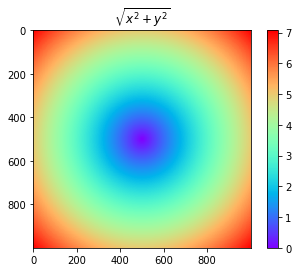

In [18]:
# meshgrid
# 그래프에 수식 : latex 문법
points = np.arange(-5,5,0.01)
xs, ys = np.meshgrid(points, points)
z = np.sqrt(xs**2 + ys**2)
# 팔레트
plt.imshow(z, cmap=plt.cm.rainbow) # 숫자를 컬러로 표현해줌!
plt.colorbar() # 컬러별 수의 초기값을 출력
plt.title("$\sqrt{x^2+y^2}$")
plt.show()

In [ ]:
# 이미지는 다 사각형. 다른 모양으로 만드는 건 나머지 부분으로 transparent 처리한 것

In [ ]:
# CNN (convolution nueral network)
# 사운드 양자화 -> 맵핑
# 이미지, 사운드, 텍스트 마이닝 ~~ 모두 숫자로 맵핑

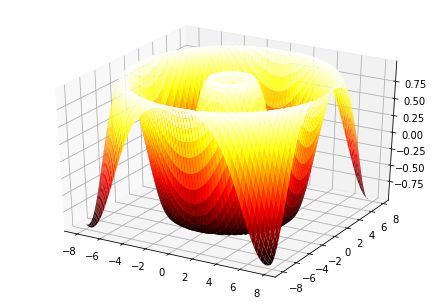

In [32]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig) # 3차원 출력 도화지
X = np.arange(-8, 8, 0.25) # 0,0
Y = np.arange(-8, 8, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot') # r = row, c = column
plt.show()
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.rainbow) # cmap = color map
plt.show()

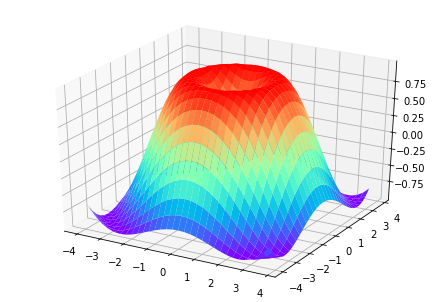

In [34]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig) # 3차원 출력 도화지
X = np.arange(-4, 4, 0.25) # 0,0
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.rainbow) # cmap = color map
plt.show()

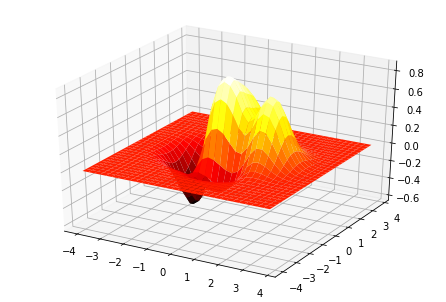

In [37]:
from mpl_toolkits.mplot3d import Axes3D
# 방정식
def f(x,y): return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X,Y)
Z = np.sin(f(X,Y))
ax.plot_surface(X,Y,Z, rstride=1, cstride=1, cmap='hot')

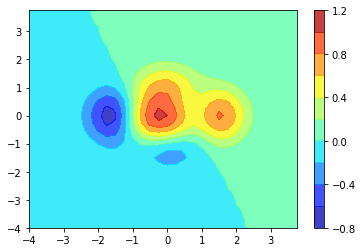

In [45]:
plt.contourf(X,Y,f(X,Y), 8, alpha=.75, cmap='jet')
plt.colorbar()
plt.show()

[0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0]


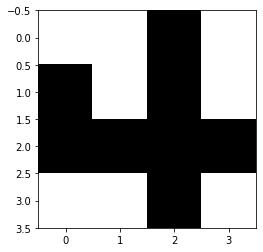

In [47]:
a = [0,0,1,0,
     1,0,1,0,
     1,1,1,1,
     0,0,1,0]
np1 = np.array(a)
print(np1)
plt.imshow(np1.reshape(4,4), cmap='Greys', interpolation='nearest') # 컬러값이 지정되지 않으면 보간해서 적용하라.
plt.show()

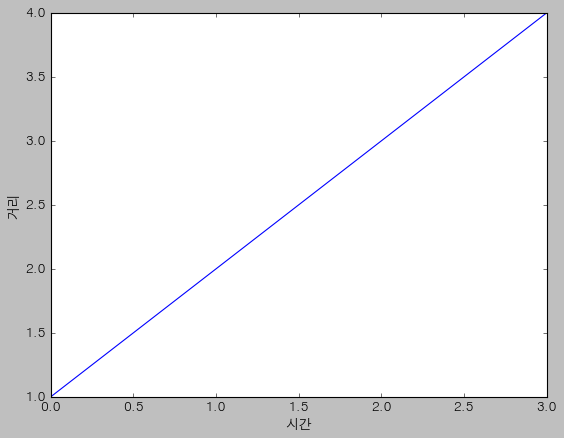

In [50]:
%matplotlib inline
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
plt.style.use(['classic'])
font_path = 'C:/Windows/Fonts/H2GTRM.TTF' # 윈도 모든 폰트가 있는 곳
font_name = font_manager.FontProperties(fname=font_path).get_name() # 폰트이름 획득
matplotlib.rc('font', family=font_name) # rc = resource configuration 폰트이름
plt.plot([1,2,3,4])
plt.xlabel("시간")
plt.ylabel("거리")
plt.show()

C:\Users\ICT01_21\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_21\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


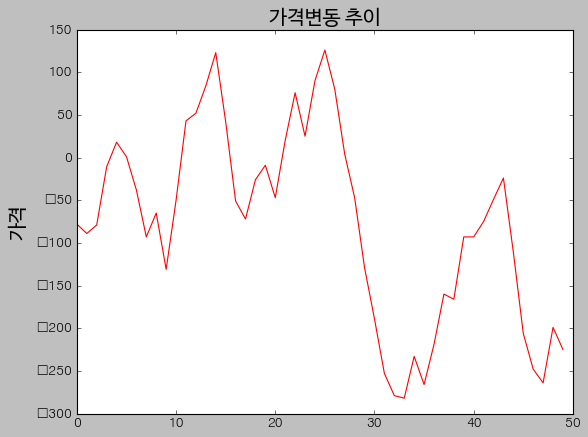

In [51]:
import matplotlib.font_manager as fm

path = 'C:\\Windows\\Fonts\\NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)
data = np.random.randint(-100, 100, 50).cumsum()
data
plt.plot(range(50), data, 'r')
plt.title('가격변동 추이', fontproperties=fontprop)
plt.ylabel('가격', fontproperties=fontprop)
plt.show()

Text(0, 0.5, 'f(x)')

findfont: Font family ['바탕'] not found. Falling back to DejaVu Sans.
findfont: Font family ['바탕'] not found. Falling back to DejaVu Sans.


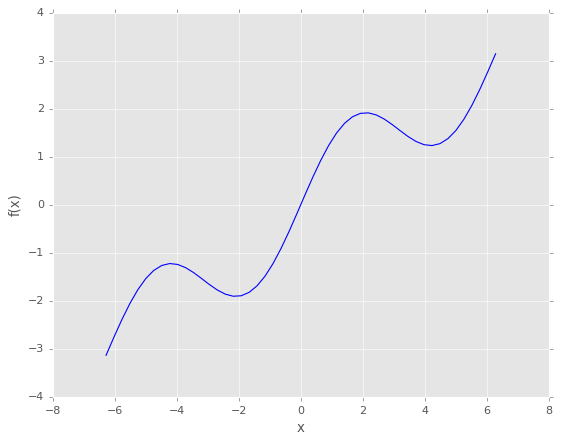

In [52]:
from pylab import plt
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rcParams['font.family'] = '바탕'
def f(x):
    return np.sin(x) + 0.5*x
x = np.linspace(-2*np.pi, 2*np.pi, 50)
plt.plot(x, f(x), 'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')


Text(0, 0.5, 'f(x)')

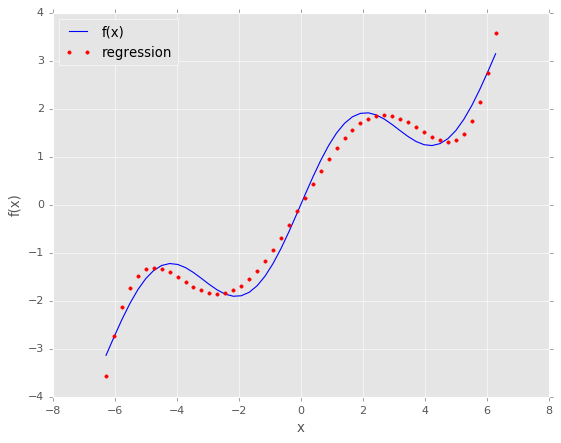

In [60]:
# 최소제곱법을 이용해서 fitting 적합
# polyfit 다차방정식으로 fitting (적합) : 계수를 찾아내는 것
reg = np.polyfit(x, f(x), deg=5) # 5차 방정식으로 피팅하라
ry = np.polyval(reg, x)  # 5차 방정식으로 회귀

plt.plot(x, f(x), 'b', label='f(x)') # 원본데이터
plt.plot(x, ry, 'r.', label='regression') # 최소제곱법으로 피팅
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('f(x)')
# 다차방정식으로 복잡한 문제를 해결하는 게 딥러닝~

In [287]:
# 지리정보시스템
import folium
map_1 = folium.Map(location=[37.565711, 126.978090], zoom_start=16, titles='Stamen Terrain')
folium.Marker([37.565711, 126.978090], popup='서울시청').add_to(map_1)
folium.Marker([37.565711, 126.978190], popup='서울시청및', icon=folium.Icon(icon='cloud')).add_to(map_1)
map_1

In [286]:
map_2 = folium.Map(location=[37.5192922, 126.9049052], zoom_start=12)
folium.Marker([37.5192922, 126.9049052], popup='서울대학교').add_to(map_2)
folium.Marker([37.5657882,126.9363833], popup='연세대학교').add_to(map_2)
folium.Marker([37.5908032,127.0255886], popup='고려대학교').add_to(map_2)
folium.Marker([37.5961993,127.0503553], popup='경희대학교').add_to(map_2)
folium.Marker([37.5572363,127.0431332], popup='한양대학교').add_to(map_2)
folium.Marker([37.5050923,126.9549125], popup='중앙대학교').add_to(map_2)
folium.Marker([37.4963153,126.9552709], popup='숭실대학교').add_to(map_2)
folium.Marker([37.5424675,127.0762538], popup='건국대학교').add_to(map_2)
folium.Marker([37.5509484,126.9388136], popup='서강대학교').add_to(map_2)
folium.Marker([37.5597518,126.9433341], popup='이화여자대학교').add_to(map_2)
map_2

In [68]:
# pandas : Series, DataFrame, Panel
# numpy 방식의 인덱싱이 가능, + dict (중복을 허용, 순서를 보장)
import pandas as pd
data = {'a': 0., 'b':1., 'c':2.}
s = pd.Series(data) # 1차원, 키가 인덱스
print(s['a']) # 키이 인덱싱
s = pd.Series(data, index=['b','c','d','a']) # 행이름
print(s['a'])
print(s['d'])
list(s)

0.0
0.0
nan


[1.0, 2.0, nan, 0.0]

In [69]:
s = pd.Series([1,2,3,4,5], index=['a','b','c','d','e'])
print("인덱스에 의한 출력", s[0]) # 순서에 의한 인덱스
print(s['a']) # 키에 의한 인덱스
print(s[:3]) # numpy
print("음수", s[-3:])
s['a'] = 100
print(s['a'])
s['f'] = 10
print(s['f'])
print('filtering에 의한 출력 ', s[s>4]) # 인덱스 : boolean index
print(s)
print(s*2) # 각 요소에 연산

인덱스에 의한 출력 1
1
a    1
b    2
c    3
dtype: int64
음수 c    3
d    4
e    5
dtype: int64
100
10
filtering에 의한 출력  a    100
e      5
f     10
dtype: int64
a    100
b      2
c      3
d      4
e      5
f     10
dtype: int64
a    200
b      4
c      6
d      8
e     10
f     20
dtype: int64


In [71]:
data = np.array(['a','b','c','d']) #ndarray
# range => list
# arange => ndarray
# RangeIndex => Index
s = pd.Series(data) # ndarry를 이용해 시리즈 초기화, RangeIndex객체가 자동으로 생성됨
print("시리즈 데이터", s.values) # 값만
print("시리즈 인덱스", s.index) # RangeIndex
print("시리즈 초기화", s)
print("시리즈 인덱스의 값", s.index.values)

시리즈 데이터 ['a' 'b' 'c' 'd']
시리즈 인덱스 RangeIndex(start=0, stop=4, step=1)
시리즈 초기화 0    a
1    b
2    c
3    d
dtype: object
시리즈 인덱스의 값 [0 1 2 3]


In [73]:
print(s[0])

a


In [74]:
print(s.head()) # 데이터 확인 (뒤는 tail)

0    a
1    b
2    c
3    d
dtype: object


In [75]:
print(s.value_counts()) # 도수분포표

b    1
c    1
a    1
d    1
dtype: int64


In [79]:
print(s.value_counts(normalize=True)) # 전체를 사이즈 1로 만들라는 얘기 (상대도수분포표)


b    0.25
c    0.25
a    0.25
d    0.25
dtype: float64


In [80]:
print(s.describe()) # 숫자 변수에 대해서만, 문자열 => object

count     4
unique    4
top       b
freq      1
dtype: object


In [82]:
print("데이터 타입은: ", s.dtypes)
print("차원", s.ndim)
print("차수", s.shape)

데이터 타입은:  object
차원 1
차수 (4,)


In [96]:
sdata ={'Ohio':35000, 'Texas':71000, 'Oregon':16000, 'Utah':5000}
obj3 = pd.Series(sdata)
print(obj3)
print(obj3.shape)

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64
(4,)


In [97]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
print(obj4)
print(obj4.shape)

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64
(4,)


In [98]:
print("시리즈 인덱스", obj3.index)
print("시리즈 인덱스", obj4.index)

시리즈 인덱스 Index(['Ohio', 'Texas', 'Oregon', 'Utah'], dtype='object')
시리즈 인덱스 Index(['California', 'Ohio', 'Oregon', 'Texas'], dtype='object')


In [99]:
print("null이 있는가", pd.isnull(obj4)) # null일때 True
print("결측치가 있는가", pd.notnull(obj4)) # null이 아닐 때 True
print("객체 출력")


null이 있는가 California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool
결측치가 있는가 California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool
객체 출력


In [100]:
print("obj3을 출력합니다.", obj3)
print("obj4을 출력합니다.", obj4)

obj3을 출력합니다. Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64
obj4을 출력합니다. California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64


In [101]:
print("연산결과를 출력합니다", obj3+obj4)

연산결과를 출력합니다 California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64


In [102]:
s = pd.Series(['A', 'B', 'Aaba', 'Baca', np.nan, 'CABA', 'cat'])
s.str.count('a') # 문자열 처리 함수!

0    0.0
1    0.0
2    2.0
3    2.0
4    NaN
5    0.0
6    1.0
dtype: float64

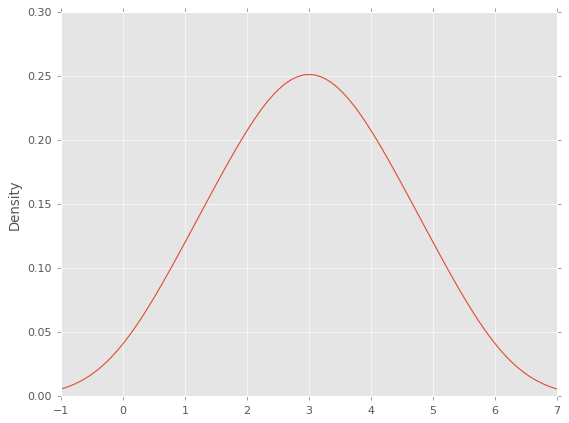

In [103]:
s = pd.Series([1, 2, 2.5, 3, 3.5, 4, 5]) 
s.plot.kde() #kernel density estimate 커널 밀도 추청
# 데이터가 없는 부분은 kernel로 예측 (가우시안 분포)
# https://darkpgmr.tistory.com/147 이 글을 꼭 읽어보쟝
plt.show()

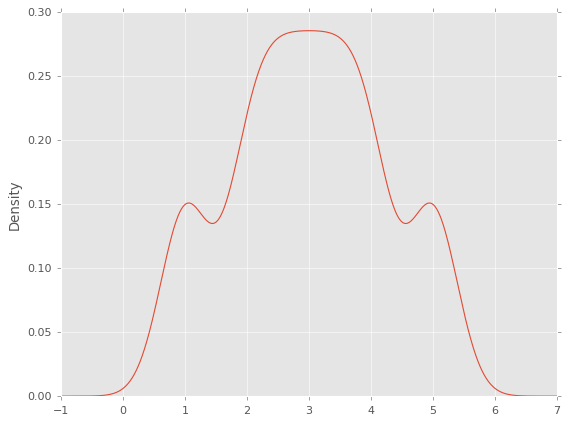

In [104]:
s.plot.kde(bw_method=0.3) # 과적합
plt.show()

In [107]:
import pandas as pd
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data 

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [108]:
data['area']
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [109]:
# 객체 비교 is None
data.area is data['area']

True

In [110]:
# 객체에서 변수를 실시간 추가하는 것이 가능
# list : append
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [111]:
data.values #ndarray로 바꿔줌 => numpy 함수로 처리

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [112]:
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [113]:
data.values[0] # 행값

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [116]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [118]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [119]:
data.iloc[0,2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [120]:
data['Florida':'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [123]:
import pandas as pd
import numpy as np

d = {'Name':pd.Series(['김하나','이하나','삼하나','사하나','오하나','육하나','칠하나', '팔하나']),
   'Age':pd.Series([25,26,25,23,30,29,23]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8])}
 
df = pd.DataFrame(d)
print(df)

  Name   Age  Rating
0  김하나  25.0    4.23
1  이하나  26.0    3.24
2  삼하나  25.0    3.98
3  사하나  23.0    2.56
4  오하나  30.0    3.20
5  육하나  29.0    4.60
6  칠하나  23.0    3.80
7  팔하나   NaN     NaN


In [124]:
print('축', df.axes)
print('데이터 타입', df.dtypes)
print('데이터 타입', df.get_dtype_counts) # unique 한 데이터만 (중복제거)

축 [RangeIndex(start=0, stop=8, step=1), Index(['Name', 'Age', 'Rating'], dtype='object')]
데이터 타입 Name       object
Age       float64
Rating    float64
dtype: object
데이터 타입 <bound method NDFrame.get_dtype_counts of   Name   Age  Rating
0  김하나  25.0    4.23
1  이하나  26.0    3.24
2  삼하나  25.0    3.98
3  사하나  23.0    2.56
4  오하나  30.0    3.20
5  육하나  29.0    4.60
6  칠하나  23.0    3.80
7  팔하나   NaN     NaN>


In [126]:
print('비었나', df.empty) # 데이터가 비었나
print('차원', df.ndim)
print('차수', df.shape)
print('사이즈', df.size)
print('값', df.values)
print(df.head(2))
print(df.tail(2))

비었나 False
차원 2
차수 (8, 3)
사이즈 24
값 [['김하나' 25.0 4.23]
 ['이하나' 26.0 3.24]
 ['삼하나' 25.0 3.98]
 ['사하나' 23.0 2.56]
 ['오하나' 30.0 3.2]
 ['육하나' 29.0 4.6]
 ['칠하나' 23.0 3.8]
 ['팔하나' nan nan]]
  Name   Age  Rating
0  김하나  25.0    4.23
1  이하나  26.0    3.24
  Name   Age  Rating
6  칠하나  23.0     3.8
7  팔하나   NaN     NaN


In [129]:
print("합계", df.sum()) # 전체 데이터합

합계 Name      김하나이하나삼하나사하나오하나육하나칠하나팔하나
Age                            181
Rating                       25.61
dtype: object


In [130]:
print(df.mean()) # 숫자만 적용
print(df.std())

Age       25.857143
Rating     3.658571
dtype: float64
Age       2.734262
Rating    0.698628
dtype: float64


In [133]:
print(df.describe()) # 숫자 데이터만 적용

             Age    Rating
count   7.000000  7.000000
mean   25.857143  3.658571
std     2.734262  0.698628
min    23.000000  2.560000
25%    24.000000  3.220000
50%    25.000000  3.800000
75%    27.500000  4.105000
max    30.000000  4.600000


In [136]:
print('오브젝트', df.describe(include=['object'])) # 문자

오브젝트        Name
count     8
unique    8
top     사하나
freq      1


In [134]:
print(df.describe(include='all')) # unique, top, freq 가 추가됨

       Name        Age    Rating
count     8   7.000000  7.000000
unique    8        NaN       NaN
top     사하나        NaN       NaN
freq      1        NaN       NaN
mean    NaN  25.857143  3.658571
std     NaN   2.734262  0.698628
min     NaN  23.000000  2.560000
25%     NaN  24.000000  3.220000
50%     NaN  25.000000  3.800000
75%     NaN  27.500000  4.105000
max     NaN  30.000000  4.600000


In [217]:
data = {'state':['경기','강원','서울','충북','인천'],
       'year':[2000, 2001, 2002, 2001, 2002],
       'pop':[1.5, 1.7, 3.6, 2.4, 2.9]}
frame2 = pd.DataFrame(data, columns=['year','state','pop','debt'], index=['one','two','three','four','five'])

In [140]:
# 1) state만 출력하시오
frame2['state']
frame2.state

one      경기
two      강원
three    서울
four     충북
five     인천
Name: state, dtype: object

In [142]:
# 2) debt열을 추가하고 모든 값을 16.5로 입력하시오
frame2.debt = 16.5
frame2

,year,state,pop,debt
one,2000,경기,1.5,16.5
two,2001,강원,1.7,16.5
three,2002,서울,3.6,16.5
four,2001,충북,2.4,16.5
five,2002,인천,2.9,16.5


In [145]:
# 3) debt 를 pd.Series([-1.2, -1.5,-1.7], index=['two'm,'four','five'])로 수정하시오
frame2.debt = pd.Series([-1.2, -1.5,-1.7], index=['two','four','five'])
frame2

,year,state,pop,debt
one,2000,경기,1.5,NaN
two,2001,강원,1.7,-1.2
three,2002,서울,3.6,NaN
four,2001,충북,2.4,-1.5
five,2002,인천,2.9,-1.7


In [216]:
# 4) 파생변수 'estern'에 주소가 서울인가를 따져 서울은 True, 아니면 False가 입력되게 하시오
df = [frame2.state == '서울']
frame2['estern'] = df[0]
frame2

,year,state,pop,debt,estern
one,2000,경기,1.5,NaN,False
two,2001,강원,1.7,-1.2,False
three,2002,서울,3.6,NaN,True
four,2001,충북,2.4,-1.5,False
five,2002,인천,2.9,-1.7,False


In [220]:
frame2['estern'] = frame2.state == '서울'
print(frame2.colums)
del frame2['estern']

,year,state,pop,debt,estern
one,2000,경기,1.5,NaN,False
two,2001,강원,1.7,-1.2,False
three,2002,서울,3.6,NaN,True
four,2001,충북,2.4,-1.5,False
five,2002,인천,2.9,-1.7,False


In [221]:
print(frame2['year']['one']) # 열이 먼저옴 (직관에 반함)
print(frame2.loc['one', 'year']) # 그래서 loc를 써주면 좋음

2000
2000


시간 함수

In [223]:

- 리눅스 : timestamp 1970.1.1 이후로 경과된 mili초로 표현
- 내부적으로 데이터 저장시 timestamp 형식으로 저장
- pandas에서는 nano초까지 표현
- pandas에서는 시간 index를 지원 (시계열 분석을 위해서)
- DateTimeIndex, PeriodIndex 주기값
- 파이썬 time.time() : 2000.1.1 부터 경과된 mili초로 표현
- datetime(날짜와 시간을 표현)

In [225]:
import time
print(time.time()) # 밀리초로 표현
print(time.localtime()) # 년월일 시분초

1578383469.0046058
time.struct_time(tm_year=2020, tm_mon=1, tm_mday=7, tm_hour=16, tm_min=51, tm_sec=9, tm_wday=1, tm_yday=7, tm_isdst=0)


In [229]:
yesterday = time.localtime(time.time()-60*60*24) # 시간연산
yesterday
print(yesterday)

time.struct_time(tm_year=2020, tm_mon=1, tm_mday=6, tm_hour=16, tm_min=52, tm_sec=14, tm_wday=0, tm_yday=6, tm_isdst=0)


In [228]:
time.strftime('%Y %m %d') # 시간을 문자열로 변경해서 출력

'2020 01 07'

In [236]:
from datetime import date, time, datetime, timedelta # 시간차
now = datetime.now() # 년월일시분초
print(now)
now.year, now.month, now.day

2020-01-07 16:56:11.401647


(2020, 1, 7)

In [237]:
now.timestamp() # 시간을 밀리초로 표현하고 싶을 때

1578383771.401647

In [239]:
now_str = now.strftime('%Y-%m-%d %H:%M:%S') # 문자열
now_str

'2020-01-07 16:56:11'

In [244]:
datetime.strptime(now_str, '%Y-%m-%d %H:%M:%S') # 날짜형식으로 변환

datetime.datetime(2020, 1, 7, 16, 56, 11)

In [246]:
delta = datetime(2015, 1, 7) - datetime(2010, 6, 24, 8, 15)
print("시간차는=", delta, delta.days, delta.seconds)

시간차는= 1657 days, 15:45:00 1657 56700


In [249]:
start = datetime(2020,1,7)
print(start + timedelta(12)) # 기본이 날짜
start + timedelta(hours=-5)

2020-01-19 00:00:00


datetime.datetime(2020, 1, 6, 19, 0)

In [251]:
import pandas as pd
print(pd.datetime.now())
print(pd.Timestamp('2017-03-01'))
print(pd.Timestamp(1587687255, unit='s'))

2020-01-07 17:07:04.261910
2017-03-01 00:00:00
2020-04-24 00:14:15


In [255]:
# DatetimeIndex 생성 (행 : index, 열 : columns)
# 30분 단위로 
print(pd.date_range("11:00","13:30", freq="30min"))

DatetimeIndex(['2020-01-07 11:00:00', '2020-01-07 11:30:00',
               '2020-01-07 12:00:00', '2020-01-07 12:30:00',
               '2020-01-07 13:00:00', '2020-01-07 13:30:00'],
              dtype='datetime64[ns]', freq='30T')


In [258]:
# 그 중에서 시간만 빼겠다
print("시간으로", pd.date_range("11:00", "13:00", freq="30min").time)

시간으로 [datetime.time(11, 0) datetime.time(11, 30) datetime.time(12, 0)
 datetime.time(12, 30) datetime.time(13, 0)]


In [259]:
# 시간 단위로
print(pd.date_range("11:00", "13:30", freq='H'))

DatetimeIndex(['2020-01-07 11:00:00', '2020-01-07 12:00:00',
               '2020-01-07 13:00:00'],
              dtype='datetime64[ns]', freq='H')


In [262]:
# 지정된 시간을 DatetimeIndex로 생성
print(pd.to_datetime(pd.Series(['Jul 31, 2009','2010-01-10', None])))
print(pd.to_datetime(['2005/11/23', '2010.12.31', None]))

0   2009-07-31
1   2010-01-10
2          NaT
dtype: datetime64[ns]
DatetimeIndex(['2005-11-23', '2010-12-31', 'NaT'], dtype='datetime64[ns]', freq=None)


In [263]:
print(pd.date_range('1/1/2017', periods=5)) # 일간격 : 기본 주기는 날짜

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05'],
              dtype='datetime64[ns]', freq='D')


In [264]:
print(pd.date_range('1/1/2017', periods=5, freq='M'))

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31'],
              dtype='datetime64[ns]', freq='M')


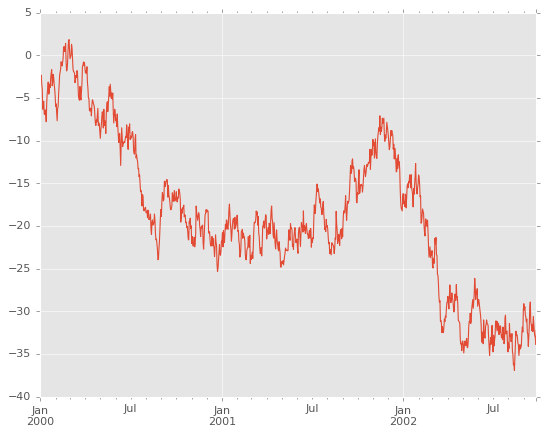

In [265]:
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

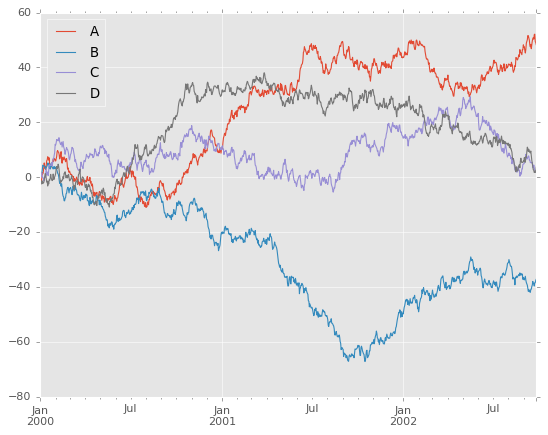

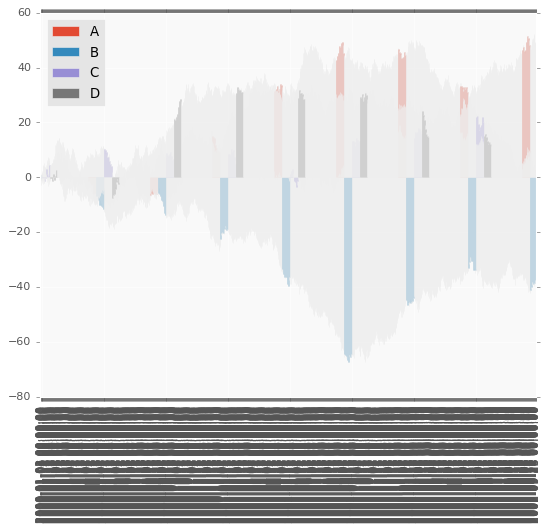

In [267]:
df = pd.DataFrame(np.random.randn(1000,4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
df.plot()
df.plot.bar()

In [ ]:
# 문제 다음 데이터를 데이터프레임에 저장하시요
#         지역  2018     2017 2016 2015 2015-2018 증가율
# 서울 수도권  9904312 9631482 9762546 9853972    0.0283
# 부산 경상권  3448737 3393191 3512547 3655437    0.0163
# 인천 수도권  2890451 2632035 2517680 2466338    0.0982
# 대구 경상권  2466052 2431774 2456016 2473990    0.0141 

In [269]:
columns = ['지역','2018','2017','2016','2015','2015-2018증가율']
index = ['서울','부산','인천', '대구']

In [ ]:
# 문제 : "2015-2018 증가율"을 %로 변경하시오
# 문제 : 2015-2017 증가율을 구해서 변수를 추가하시오 (열이름 : "2015-2017 증가율")

In [275]:
data = {'지역':['수도권', '경상권', '수도권', '경상권'],
       '2018': [9904312, 3448737, 2890451, 2466052],
       '2017': [9631482, 3393191, 2632035, 2431774],
       '2016': [9762546, 3512547, 2517680, 2456016],
       '2015': [9853972, 3655437, 2466338, 2473990],
       '2015-2018증가율': [0.0283, 0.0163, 0.0982, 0.0141]}
popframe = pd.DataFrame(data, columns = columns, index=index)
popframe

,지역,2018,2017,2016,2015,2015-2018증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


In [276]:
popframe['2015-2018증가율'] = popframe['2015-2018증가율']*100
popframe

,지역,2018,2017,2016,2015,2015-2018증가율
서울,수도권,9904312,9631482,9762546,9853972,2.83
부산,경상권,3448737,3393191,3512547,3655437,1.63
인천,수도권,2890451,2632035,2517680,2466338,9.82
대구,경상권,2466052,2431774,2456016,2473990,1.41


In [278]:
popframe['2015-2017 증가율'] = popframe['2017']/popframe['2015']-1
popframe

,지역,2018,2017,2016,2015,2015-2018증가율,2015-2017 증가율
서울,수도권,9904312,9631482,9762546,9853972,2.83,-0.022579
부산,경상권,3448737,3393191,3512547,3655437,1.63,-0.071741
인천,수도권,2890451,2632035,2517680,2466338,9.82,0.067183
대구,경상권,2466052,2431774,2456016,2473990,1.41,-0.017064
